# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
# Karin Shulman Goren 206056905
# Details Student 2:
# Daniel Arama 313452096

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\Daniel Arama\Desktop\Matala3\assignment3-text_analysis\assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

#### <u>Exploring the data</u>
Counting females and males.

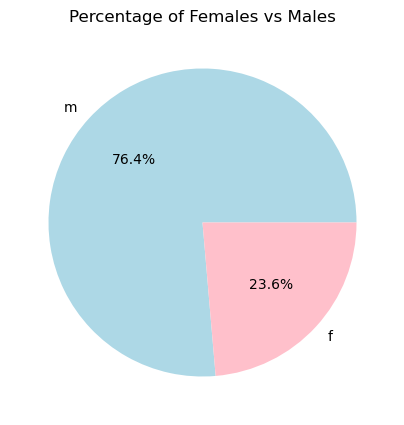

In [43]:
#Count females and males
gender_counts = df_train['gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index,colors=['lightblue', 'pink'], autopct='%1.1f%%')
plt.title('Percentage of Females vs Males')
plt.show();

Creating visualization dataframe to explore the number of words, punctuation marks, dates and hours in each story as well as the writer's gender. 

In [12]:
#Tokenizer for visualization
def visualize_tokenizer(text):
    tokens = ht.tokenize(text)
    counter_list = [0,0,0,0]
    for grp, token, token_num, (start_index, end_index) in tokens:
        if grp == "HEBREW":
            counter_list[0] += 1
        if grp == "PUNCTUATION":
            counter_list[1] += 1
        if grp == "DATE":
            counter_list[2] += 1
        if grp == "HOUR":
            counter_list[3] += 1
    return counter_list

In [13]:
#Dateframe for vizualization 
df_visualize = df_train.copy()
results = df_visualize['story'].apply(visualize_tokenizer)
df_visualize['HEBREW'] = results.apply(lambda x: x[0])
df_visualize['PUNCTUATION'] = results.apply(lambda x: x[1])
df_visualize['DATE'] = results.apply(lambda x: x[2])
df_visualize['HOUR'] = results.apply(lambda x: x[3])
df_visualize.head()

,story,gender,HEBREW,PUNCTUATION,DATE,HOUR
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m,417,90,0,0
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m,345,48,0,0
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f,297,26,0,0
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m,428,68,0,0
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f,309,25,0,0


In [14]:
print(df_visualize['DATE'].value_counts())
print(df_visualize['HOUR'].value_counts())

0    748
1      4
2      1
Name: DATE, dtype: int64
0    713
1     22
2     11
3      4
7      2
9      1
Name: HOUR, dtype: int64


We can see that the DATE column is mostly 0, and that only 40 stories have HOUR in them.</br>
we can assume that most of the stories have different hours in them so a specific hour value won't even be in the dataframe.</br> Therefore both dates and hours won't help in the prediction.</br>
Now visualize the number of words, and number of punctuation marks per gender.

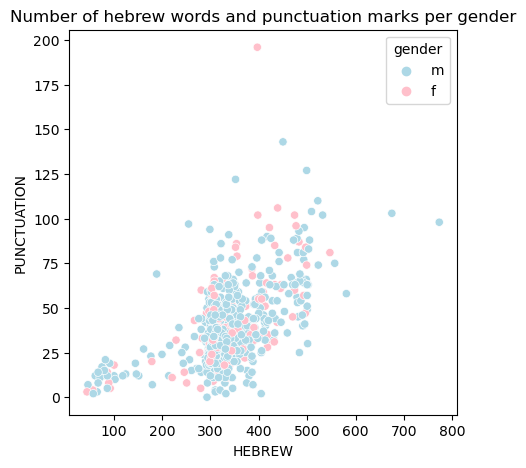

In [45]:
plt.figure(figsize=(5, 5))
colors = {'m': 'lightblue', 'f': 'pink'}
sns.scatterplot(data=df_visualize, x='HEBREW', y='PUNCTUATION', hue='gender', palette=colors)
plt.title('Number of hebrew words and punctuation marks per gender')
plt.show();

We can see from the graph, most of the data points are around 350 hebrew words and 30 punctuation marks.</br>
Also, the punctuation marks appear in almost every story, so the IDF in TfidfVectorization will score them 0 and they will hold no weight to them.</br>
There is no significant difference between the genders, and therefore they won't help us determine whether a story was written by female or male.</br>

Visualize word with 2 letters or less, we are guessing most of them are stop words.

In [16]:
def visualize_stop_word_tokenizer(text):
    tokens = ht.tokenize(text)
    word_list = []
    for grp, token, token_num, (start_index, end_index) in tokens:
        if grp == "HEBREW" and len(token) <= 2:
            word_list.append(token)
    word_list = list(set(word_list))
    return word_list

In [17]:
all_word_lists = df_visualize['story'].apply(visualize_stop_word_tokenizer)
all_word_lists = all_word_lists.explode().dropna().unique()
all_word_lists

array(['זה', 'כן', 'על', 'קמ', 'אם', 'כי', 'של', 'אז', 'לו', 'פה', 'כל',
       'עם', 'רק', 'בו', 'שם', 'די', 'עד', 'לא', 'מה', 'את', 'לה', 'לי',
       'מי', 'בח', 'הם', 'בן', 'ל', 'יש', 'אף', 'גם', 'כך', 'קל', 'בי',
       'אי', 'או', 'שש', 'יב', 'ר', 'אל', 'דל', 'ס', 'חם', 'הן', 'כ',
       'גן', 'גר', 'בת', 'לך', 'אך', 'עז', 'בה', 'ז', 'ים', 'תת', 'מ',
       'צד', 'קם', 'דם', 'תה', 'זו', 'יד', 'כה', 'א', 'ד', 'לב', 'רב',
       'בר', 'ג', 'חד', 'םא', 'ש', 'ול', 'בד', 'ב', 'ו', 'אה', 'מא', 'ה',
       'דפ', 'כף', 'אט', 'שב', 'מת', 'בא', 'קר', 'גו', 'י', 'ע', 'חג',
       'בך', 'רם', 'טק', 'סך', 'מס', 'ח', 'מד', 'עץ', 'שר', 'חל', 'דק',
       'דה', 'נח', 'זז', 'פי', 'קץ', 'תו', 'גב', 'רע', 'אץ', 'עת', 'מר',
       'לם', 'מק', 'שף', 'דן', 'רץ', 'פס', 'זר', 'נס', 'תל', 'מן', 'אש',
       'פק', 'צב', 'כח', 'הנ', 'הר', 'חס', 'טל', 'דף', 'אק', 'צק', 'טו',
       'גק', 'ת', 'ט', 'אח', 'ככ', 'חן', 'צץ', 'גג', 'וב', 'אמ', 'אר',
       'אג', 'דג', 'צל', 'נו', 'לד', 'בק', 'גז', 'שח', 'חי', 'ט

Our assumption was wrong, we can find in the list many 2 characters word that are meaningful: hot, cold, tree, sing, fish etc. </br> We thought check 1 letter "words" too but 1 letter words may also have meaning like "ה" - god or meaningful grammar error like "ש רציתי".</br> In conclusion we can't remove words based on thier length.

### <u>Exploring Algorithms</u>
Encoding female and male.

In [18]:
#Encoding 'm' as 1 and 'f' as 0
label_encoder = LabelEncoder()
X = df_train['story']
y = label_encoder.fit_transform(df_train['gender'])
X.head()
y[:5]

0    כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...
1    לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...
2    מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...
3    כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...
4    ‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...
Name: story, dtype: object

array([1, 1, 0, 1, 0])

In the exploration stage we saw only the words are meaningful to our prediction.</br>
Build the tokenizer warpper accordingly.

In [19]:
#Only hebrew words tokenizer
def tokenize_heb(text):
    tokens = ht.tokenize(text)
    token_list = []
    for grp, token, token_num, (start_index, end_index) in tokens:
        if grp == "HEBREW":
            token_list.append(token)
    return token_list

### <u>KNN</u>

In [20]:
#KNN CountVectorizer
knn_cv_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('norm', preprocessing.Normalizer()),
    ('clf_knn', KNeighborsClassifier())
])
knn_cv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__max_features": [1000, 5000, 10000, 30000],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "norm__norm": ['l1', 'l2'],
    "clf_knn__n_neighbors": [5, 7, 9, 13, 19]
}
search_knn_cv = GridSearchCV(knn_cv_pipe, knn_cv_param_grid, cv = 10, scoring='f1_macro')
search_knn_cv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_knn_cv.best_score_)
print(search_knn_cv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf_knn', KNeighborsClassifier())]),
             param_grid={'clf_knn__n_neighbors': [5, 7, 9, 13, 19],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [1000, 5000, 10000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.579):
{'clf_knn__n_neighbors': 5, 'norm__norm': 'l2', 'vect__max_features': 30000, 'vect__ngram_range': (2, 2), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


In [21]:
#KNN TfidfVectorizer
knn_tfidfv_pipe = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf_knn', KNeighborsClassifier())
])
knn_tfidfv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__max_features": [1000, 5000, 10000, 30000],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_df": [0.5, 0.75, 1],
    "clf_knn__n_neighbors": [5, 7, 9, 13, 19]
}
search_knn_tfidfv = GridSearchCV(knn_tfidfv_pipe, knn_tfidfv_param_grid, cv = 10, scoring='f1_macro')
search_knn_tfidfv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_knn_tfidfv.best_score_)
print(search_knn_tfidfv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf_knn', KNeighborsClassifier())]),
             param_grid={'clf_knn__n_neighbors': [5, 7, 9, 13, 19],
                         'vect__max_df': [0.5, 0.75, 1],
                         'vect__max_features': [1000, 5000, 10000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.637):
{'clf_knn__n_neighbors': 5, 'vect__max_df': 0.5, 'vect__max_features': 10000, 'vect__ngram_range': (2, 2), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


KNN
* Best model: KNN with TfidfVectorizer and the parameters: max_df = 0.5, maximum_features = 10,000 and 2 word ngrams for the vectorizer,</br> and 5 neighbors for KNN.</br>
* Average f1 score: 63.7%

### <u>Multinominal Naive Bayes</u>

In [22]:
#Multinominal Naive Bayes CountVectorizer
mnb_cv_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('norm', preprocessing.Normalizer()),
    ('clf_nb', MultinomialNB())
])
mnb_cv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__max_features": [1000, 5000, 10000,30000],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "norm__norm": ['l1', 'l2']
}
search_mnb_cv = GridSearchCV(mnb_cv_pipe, mnb_cv_param_grid, cv = 10, scoring='f1_macro')
search_mnb_cv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_mnb_cv.best_score_)
print(search_mnb_cv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf_nb', MultinomialNB())]),
             param_grid={'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [1000, 5000, 10000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.466):
{'norm__norm': 'l2', 'vect__max_features': 1000, 'vect__ngram_range': (3, 3), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


In [23]:
#Multinominal Naive Bayes TfidfVectorizer
mnb_tfidfv_pipe = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf_nb', MultinomialNB())
])
mnb_tfidfv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__max_features": [1000, 5000, 10000, 30000],
    "vect__max_df": [0.5, 0.75, 1],
    "vect__ngram_range": [(1,1), (2,2), (3,3)]
}
search_mnb_tfidfv = GridSearchCV(mnb_tfidfv_pipe, mnb_tfidfv_param_grid, cv = 10, scoring='f1_macro')
search_mnb_tfidfv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_mnb_tfidfv.best_score_)
print(search_mnb_tfidfv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf_nb', MultinomialNB())]),
             param_grid={'vect__max_df': [0.5, 0.75, 1],
                         'vect__max_features': [1000, 5000, 10000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.466):
{'vect__max_df': 0.5, 'vect__max_features': 1000, 'vect__ngram_range': (3, 3), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


Multinominal Naive Bayes</br>
Both models achieved the same score 46.6%, which is the lowest score we got.

### <u>Decision Tree</u>

In [24]:
#Decision Tree CountVectorizer
dt_cv_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('norm', preprocessing.Normalizer()),
    ('clf_dt', DecisionTreeClassifier()),
])
dt_cv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_features": [1000, 5000, 10000, 30000],
    "norm__norm": ['l1', 'l2'],
    "clf_dt__max_depth": [3, 5, 7],
    "clf_dt__min_samples_split": [30, 40, 50]
}
search_dt_cv = GridSearchCV(dt_cv_pipe, dt_cv_param_grid, cv = 10, scoring='f1_macro')
search_dt_cv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_dt_cv.best_score_)
print(search_dt_cv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf_dt', DecisionTreeClassifier())]),
             param_grid={'clf_dt__max_depth': [3, 5, 7],
                         'clf_dt__min_samples_split': [30, 40, 50],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [1000, 5000, 10000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.631):
{'clf_dt__max_depth': 7, 'clf_dt__min_samples_split': 40, 'norm__norm': 'l2', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


In [25]:
#Decision Tree TfidfVectorizer
dt_tfidfv_pipe = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf_dt', DecisionTreeClassifier()),
])
dt_tfidfv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_features": [1000, 5000, 10000, 30000],
    "vect__max_df": [0.5, 0.75, 1],
    "clf_dt__max_depth": [3, 5, 7],
    "clf_dt__min_samples_split": [30, 40, 50]
}
search_dt_tfidfv = GridSearchCV(dt_tfidfv_pipe, dt_tfidfv_param_grid, cv = 10, scoring='f1_macro')
search_dt_tfidfv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_dt_tfidfv.best_score_)
print(search_dt_tfidfv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf_dt', DecisionTreeClassifier())]),
             param_grid={'clf_dt__max_depth': [3, 5, 7],
                         'clf_dt__min_samples_split': [30, 40, 50],
                         'vect__max_df': [0.5, 0.75, 1],
                         'vect__max_features': [1000, 5000, 10000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.625):
{'clf_dt__max_depth': 7, 'clf_dt__min_samples_split': 50, 'vect__max_df': 0.75, 'vect__max_features': 5000, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


Decision Tree
* Best model: Desicion tree with CountVectorizer and the parameters: max_features = 1,000 and 1 word ngrams for the vectorizer,</br>l2 for the normalizer and max_depth = 7 and min_sample_split = 50 for the Decision tree.</br>
* Average f1 score: 63.1%

### <u>Perceptron</u>

In [26]:
#Perceptron CountVectorizer
per_cv_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('norm', preprocessing.Normalizer()),
    ('clf_perceptron', Perceptron(random_state=42))
])
per_cv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_features": [5000, 10000, 20000, 30000],
    "norm__norm": ['l1','l2'],
    "clf_perceptron__class_weight": ['balanced', None],
    "clf_perceptron__eta0": [0.01, 0.001, 0.0001],
    "clf_perceptron__penalty": ['l2','l1','elasticnet', None]
}
search_per_cv = GridSearchCV(per_cv_pipe, per_cv_param_grid, cv = 10, scoring='f1_macro')
search_per_cv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_per_cv.best_score_)
print(search_per_cv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf_perceptron',
                                        Perceptron(random_state=42))]),
             param_grid={'clf_perceptron__class_weight': ['balanced', None],
                         'clf_perceptron__eta0': [0.01, 0.001, 0.0001],
                         'clf_perceptron__penalty': ['l2', 'l1', 'elasticnet',
                                                     None],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.672):
{'clf_perceptron__class_weight': 'balanced', 'clf_perceptron__eta0': 0.01, 'clf_perceptron__penalty': None, 'norm__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


In [27]:
#Perceptron TfidfVectorizer
per_tfidfv_pipe = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf_perceptron', Perceptron(random_state=42))
])
per_tfidfv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_features": [5000, 10000, 20000, 30000],
    "vect__max_df": [0.5, 0.75, 1],
    "clf_perceptron__class_weight": ['balanced', None],
    "clf_perceptron__eta0": [0.01, 0.001, 0.0001],
    "clf_perceptron__penalty": ['l2','l1','elasticnet', None]
}
search_per_tfidfv = GridSearchCV(per_tfidfv_pipe, per_tfidfv_param_grid, cv = 10, scoring='f1_macro')
search_per_tfidfv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_per_tfidfv.best_score_)
print(search_per_tfidfv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf_perceptron',
                                        Perceptron(random_state=42))]),
             param_grid={'clf_perceptron__class_weight': ['balanced', None],
                         'clf_perceptron__eta0': [0.01, 0.001, 0.0001],
                         'clf_perceptron__penalty': ['l2', 'l1', 'elasticnet',
                                                     None],
                         'vect__max_df': [0.5, 0.75, 1],
                         'vect__max_features': [5000, 10000, 20000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.683):
{'clf_perceptron__class_weight': 'balanced', 'clf_perceptron__eta0': 0.01, 'clf_perceptron__penalty': 'l1', 'vect__max_df': 0.5, 'vect__max_features': 30000, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


Perceptron
* Best model: Perceptron with TfidfVectorizer with parameters: max_df =0.5, max_features= 30,000 and 1 word ngrams for the vectorizer,</br>and class_weight = balanced, eta = 0.01, and penalty = l1.</br>
* Average f1 score: 68.3%

### <u>SGD</u>

In [28]:
#SGD CountVectorizer
sgd_cv_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('norm', preprocessing.Normalizer()),
    ('clf_sgd', SGDClassifier(random_state=42))
])
sgd_cv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_features": [5000, 10000, 20000, 30000],
    "norm__norm": ['l1','l2'],
    "clf_sgd__class_weight": ['balanced', None],
    "clf_sgd__loss": ['log', 'hinge'],
    "clf_sgd__penalty": ['l2','l1','elasticnet', None],
    "clf_sgd__learning_rate": ['constant', 'optimal', 'invscaling', 'adaptive']
}
search_sgd_cv = GridSearchCV(sgd_cv_pipe, sgd_cv_param_grid, cv = 10, scoring='f1_macro')
search_sgd_cv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_sgd_cv.best_score_)
print(search_sgd_cv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf_sgd',
                                        SGDClassifier(random_state=42))]),
             param_grid={'clf_sgd__class_weight': ['balanced', None],
                         'clf_sgd__learning_rate': ['constant', 'optimal',
                                                    'invscaling', 'adaptive'],
                         'clf_sgd__loss': ['log', 'hinge'],
                         'clf_sgd__penalty': ['l2', 'l1', 'elasticnet', None],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.704):
{'clf_sgd__class_weight': 'balanced', 'clf_sgd__learning_rate': 'optimal', 'clf_sgd__loss': 'hinge', 'clf_sgd__penalty': 'l2', 'norm__norm': 'l2', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


In [29]:
#SGD TfidfVectorizer
sgd_tfidfv_pipe = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf_sgd', SGDClassifier(random_state=42))
])
sgd_tfidfv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_features": [5000, 10000, 20000, 30000],
    "vect__max_df": [0.5, 0.75, 1],
    "clf_sgd__class_weight": ['balanced', None],
    "clf_sgd__loss": ['log', 'hinge'],
    "clf_sgd__penalty": ['l2','l1','elasticnet', None],
    "clf_sgd__learning_rate": ['constant', 'optimal', 'invscaling', 'adaptive']
}
search_sgd_tfidfv = GridSearchCV(sgd_tfidfv_pipe, sgd_tfidfv_param_grid, cv = 10, scoring='f1_macro')
search_sgd_tfidfv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_sgd_tfidfv.best_score_)
print(search_sgd_tfidfv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf_sgd',
                                        SGDClassifier(random_state=42))]),
             param_grid={'clf_sgd__class_weight': ['balanced', None],
                         'clf_sgd__learning_rate': ['constant', 'optimal',
                                                    'invscaling', 'adaptive'],
                         'clf_sgd__loss': ['log', 'hinge'],
                         'clf_sgd__penalty': ['l2', 'l1', 'elasticnet', None],
                         'vect__max_df': [0.5, 0.75, 1],
                         'vect__max_features': [5000, 10000, 20000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.712):
{'clf_sgd__class_weight': None, 'clf_sgd__learning_rate': 'optimal', 'clf_sgd__loss': 'hinge', 'clf_sgd__penalty': 'l1', 'vect__max_df': 0.75, 'vect__max_features': 30000, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


SGD
* Best model: SGD with TfidfVectorizer with parameters: max_df = 0.75, max_features = 30,000 and 1 word ngrams for the vectorizer,</br> and class_weight = none, learning_rate = optimal, loss = hinge and penalty = l1 for the SGD. </br>
* Average f1 score: 71.2%

### <u>SVM</u>

In [30]:
#SVM CountVectorizer
svm_cv_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('norm', preprocessing.Normalizer()),
    ('clf_svm', LinearSVC(random_state = 42))
])
svm_cv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_features": [5000, 10000, 20000, 30000],
    "norm__norm": ['l1','l2'],
    'clf_svm__C': [0.1, 1, 10],
    'clf_svm__class_weight': [None, 'balanced']
}
search_svm_cv = GridSearchCV(svm_cv_pipe, svm_cv_param_grid, cv = 10, scoring='f1_macro')
search_svm_cv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_svm_cv.best_score_)
print(search_svm_cv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('norm', Normalizer()),
                                       ('clf_svm',
                                        LinearSVC(random_state=42))]),
             param_grid={'clf_svm__C': [0.1, 1, 10],
                         'clf_svm__class_weight': [None, 'balanced'],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.709):
{'clf_svm__C': 1, 'clf_svm__class_weight': 'balanced', 'norm__norm': 'l2', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


In [31]:
#SVM TfidfVectorizer
svm_tfidfv_pipe = Pipeline([
    ('vect', TfidfVectorizer(no)),
    ('clf_svm', LinearSVC(random_state = 42))
])
svm_tfidfv_param_grid = {
    "vect__tokenizer": [tokenize_heb],
    "vect__ngram_range": [(1,1), (2,2), (3,3)],
    "vect__max_features": [5000, 10000, 20000, 30000],
    "vect__max_df": [0.5, 0.75, 1],
    'clf_svm__C': [0.1, 1, 10],
    'clf_svm__class_weight': [None, 'balanced']
}
search_svm_tfidfv = GridSearchCV(svm_tfidfv_pipe, svm_tfidfv_param_grid, cv = 10, scoring='f1_macro')
search_svm_tfidfv.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search_svm_tfidfv.best_score_)
print(search_svm_tfidfv.best_params_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf_svm',
                                        LinearSVC(random_state=42))]),
             param_grid={'clf_svm__C': [0.1, 1, 10],
                         'clf_svm__class_weight': [None, 'balanced'],
                         'vect__max_df': [0.5, 0.75, 1],
                         'vect__max_features': [5000, 10000, 20000, 30000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
                         'vect__tokenizer': [<function tokenize_heb at 0x00000147C939FE50>]},
             scoring='f1_macro')

Best parameter (CV score=0.686):
{'clf_svm__C': 0.1, 'clf_svm__class_weight': 'balanced', 'vect__max_df': 0.5, 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize_heb at 0x00000147C939FE50>}


SVM
* Best model: SVM with CountVectorizer with parameters: max_featurs = 5,000 and 1 word ngram for the vectorizer,</br>l2 for the normalizer and C = 1 and class_weight = balanced for the SVM. </br>
* Average f1 score: 70.9%

### <u>Choosing the best model</u>

Our best model was SGDClassifier with TfidfVectorizer.</br>
It achieved 71.2% in the average f1 score.</br>
We chose this model to predict the test set.

In [66]:
y_pred = search_sgd_tfidfv.predict(df_test['story'])
y_pred = label_encoder.inverse_transform(y_pred)
df_predicted = pd.DataFrame({'test_example_id': df_test["test_example_id"], 'predicted_category': y_pred})
df_predicted.head(5)
df_predicted.tail(5)
df_predicted['predicted_category'].value_counts()

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m


,test_example_id,predicted_category
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


m    262
f     61
Name: predicted_category, dtype: int64

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [67]:
df_predicted.to_csv('classification_results.csv',index=False)